# PolynomialRegression with numpy

In [1]:
import numpy as np 

# To plot 
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

#### Generate sample data points to train

input = t <br>
output = sin(t) + noise

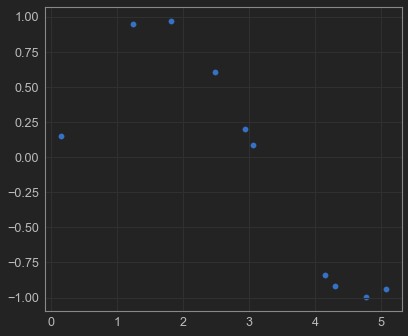

In [2]:
trainx = np.linspace(0,5,10) + np.random.random(10)
trainy = np.sin(trainx)
plt.scatter(trainx, trainy)
plt.show()

In [3]:
deg = input('Enter the degree of the polynomial :')

Enter the degree of the polynomial :3


#### Least Square Method

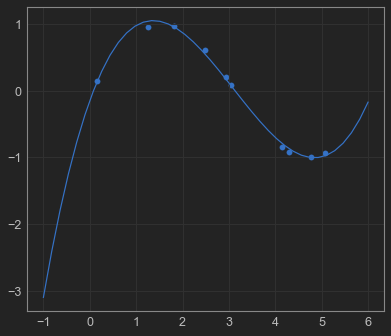

In [4]:

def PolyCoefficients(x, coeffs):
    """
    Funtion to calculate y where y = m0 + m1 * x^1 + m2 * x^2 + . . . + mn * x^n
    Input  : x, (m0, m1, . . . , mn)
    Output : y
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

def matrix_g(deg, x):    
    """
    Funtion to calculate G matrix (Refer image below)
    Input  : degree, x
    Output : G
    """
    ls = []
    for j in range(int(deg)+1):
        ls.append(pow(x,j))
    return np.stack(ls).T


G = matrix_g(deg, trainx)

L = np.linalg.inv(np.dot(G.T,G))
M0 = np.dot(np.dot(L, G.T), trainy)

x_d = np.linspace(-1, 6, 40)
plt.plot(x_d, PolyCoefficients(x_d, M0))
plt.scatter(trainx, trainy)
plt.show()

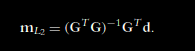

### Gradient Descent

In [5]:
M1 = np.random.random(int(deg) + 1) / 10

alpha = 10e-3 # Learning Rate

X = []

for x in trainx:
    ls = []
    for j in range(int(deg)+1):
        ls.append(pow(x,j))
    X.append(ls)
    
X =  np.stack(X)

In [6]:
for epochs in range(200000):
    
    loss = 0

    for i in range(len(X)):
    
        loss += pow((np.dot(M1, X[i]) - trainy[i]), 2)

    loss = loss / len(X)
    if epochs % 20000 == 0:
        print('Loss for interation number', epochs, 'is', np.round(loss, 5))
        
    for m in range(int(deg) + 1):
        dm = 0
        for i in range(len(X)):
            dm += (np.dot(M1, X[i]) - trainy[i]) * X[i][m]
            
        M1[m] = M1[m] - (alpha * dm / (2 * len(X)))

Loss for interation number 0 is 32.11355
Loss for interation number 20000 is 0.00345
Loss for interation number 40000 is 0.00221
Loss for interation number 60000 is 0.00219
Loss for interation number 80000 is 0.00219
Loss for interation number 100000 is 0.00219
Loss for interation number 120000 is 0.00219
Loss for interation number 140000 is 0.00219
Loss for interation number 160000 is 0.00219
Loss for interation number 180000 is 0.00219


Looks like it either got stuck at a local or global minima. 

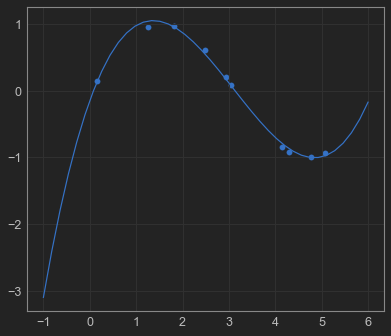

In [7]:
x_d = np.linspace(-1, 6, 40)
plt.plot(x_d, PolyCoefficients(x_d, M1))
plt.scatter(trainx, trainy)
plt.show()

Modify the learning rate (alpha) if the loss does not converge

In [8]:
print('Weights obtained by matrix multiplication :', M0)
print('Weights obtained by gradient descent :', M1)

Weights obtained by matrix multiplication : [-0.14933675  1.93898237 -0.90992909  0.09769098]
Weights obtained by gradient descent : [-0.14933674  1.93898237 -0.90992909  0.09769098]


As both solutions are similar, the minima must be a global minima.